
# Importing basic library and functions 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

upload our file

In [2]:
df = pd.read_csv("car data.csv", index_col = None)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


visualize null values

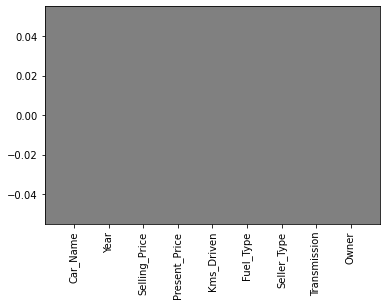

In [3]:
ax=plt.axes()
ax.set_facecolor('grey')
plt.bar(df.columns , df.isnull().sum())
plt.xticks(rotation=90)

plt.show()

In [4]:
#as shown on above graph we don't have null values 
#let drop unnecessary columns
df=df.drop(labels=['Car_Name'] , axis=1)


In [5]:
#now we will check unique values of our categorical columns
columns=['Fuel_Type' , 'Seller_Type' , "Transmission"]

for col in columns:
    print(col)
    print(df[col].unique())

Fuel_Type
['Petrol' 'Diesel' 'CNG']
Seller_Type
['Dealer' 'Individual']
Transmission
['Manual' 'Automatic']


In [6]:
#change categorical values to numerical representation

df=pd.get_dummies(df , columns=columns)

In [7]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [8]:
#create new column for number of years cars are used
df['used_years']=2022-df['Year']
df=df.drop(labels='Year' , axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,used_years
0,3.35,5.59,27000,0,0,0,1,1,0,0,1,8
1,4.75,9.54,43000,0,0,1,0,1,0,0,1,9
2,7.25,9.85,6900,0,0,0,1,1,0,0,1,5
3,2.85,4.15,5200,0,0,0,1,1,0,0,1,11
4,4.60,6.87,42450,0,0,1,0,1,0,0,1,8


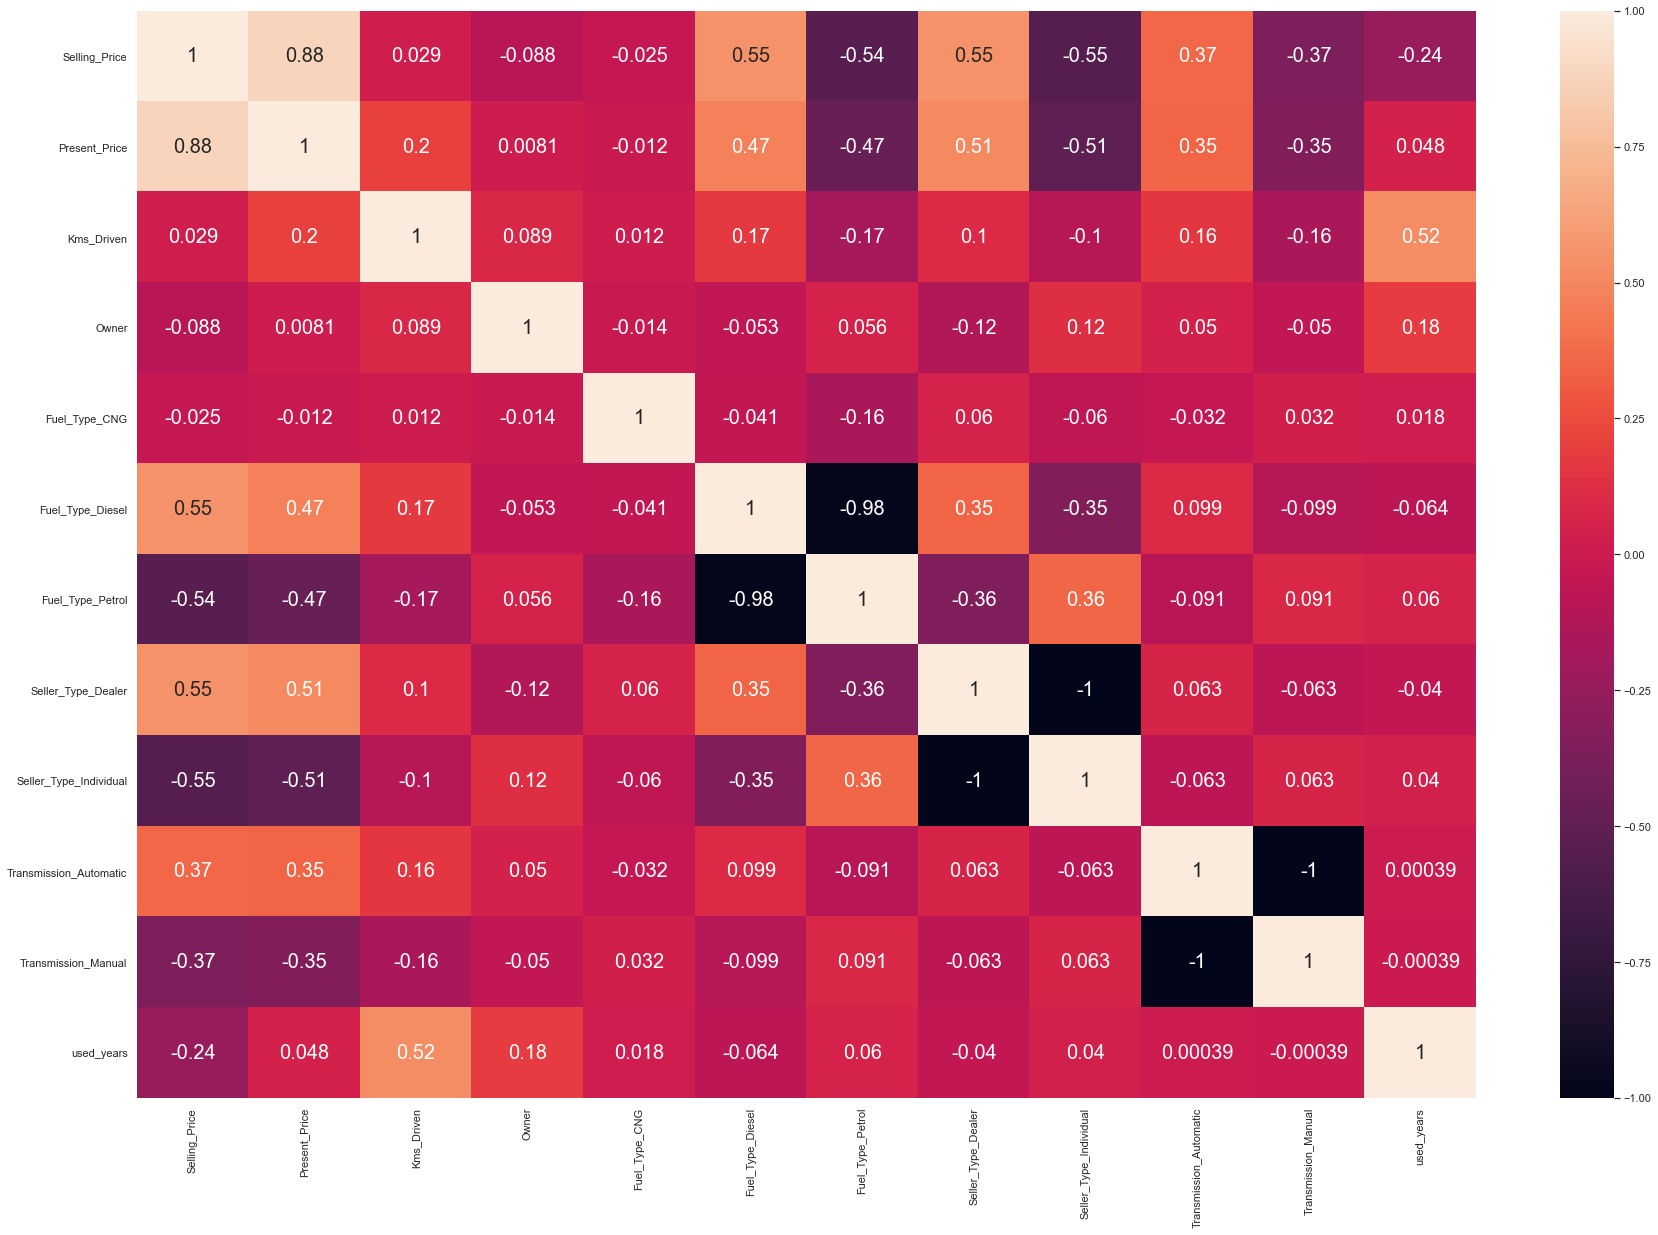

In [10]:
#visualizing correlation between each columns with seaborn heat map

sns.heatmap(df.corr() , annot=True , annot_kws={'size':20})
#plt.figure(figsize=(50,50))
sns.set(font_scale=(3))
sns.set(rc={'figure.figsize':(30,20)})
plt.show()

separate feature and target columns


In [11]:
X_check=df.drop('Selling_Price' , axis=1).values
y_check=df['Selling_Price'].values

In [12]:
print(X_check.shape , y_check.shape)

(301, 11) (301,)


split train and test values

In [13]:
from sklearn.model_selection import train_test_split , KFold , GridSearchCV

X_check_train , X_check_test , y_check_train ,y_check_test=train_test_split(X_check , y_check , test_size= 0.2 , random_state=3)

In [14]:
print(f"size train feature : {X_check_train.shape}  , size test feature :  {X_check_test.shape}   \n size of train target : \
{y_check_train.shape}   ,   size of test target : {y_check_test.shape}") 

size train feature : (240, 11)  , size test feature :  (61, 11)   
 size of train target : (240,)   ,   size of test target : (61,)


 importing Regression models to check which one is best for our data set

In [15]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor  , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [16]:
state=3
result=[]
models={'Linear Regression' : LinearRegression() , 'Ridge' : Ridge(alpha = 0.1) , "lasso" : Lasso(alpha = 0.1) ,\
        'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2 , random_state=state), \
        'Random Forest Regrssor' : RandomForestRegressor(n_estimators=1000 , min_samples_leaf=0.2) ,\
        'Gradien Boosting Regressor' : GradientBoostingRegressor(subsample=0.8 , n_estimators= 100, max_depth=1, random_state=state)}

for model in models.values():
    print(model)
    kf=KFold(n_splits=10 , random_state=state ,shuffle=True)
    CV=cross_val_score(model , X_check_train , y_check_train , cv=kf)
    print(CV)
    result.append(CV)

LinearRegression()
[0.7802275  0.92204459 0.8112438  0.85688062 0.89353739 0.9264468
 0.51742883 0.77250904 0.4185118  0.92778893]
Ridge(alpha=0.1)
[0.78024232 0.9219835  0.8115365  0.85700238 0.89369297 0.92651178
 0.51840314 0.77237156 0.41806615 0.92790594]
Lasso(alpha=0.1)
[0.76966406 0.89765398 0.85482458 0.86496258 0.89228595 0.91457371
 0.67338584 0.7547284  0.31247606 0.93951563]
DecisionTreeRegressor(max_depth=2, random_state=3)
[0.58118634 0.71932552 0.67310141 0.62607518 0.6388526  0.86197801
 0.30371786 0.7524204  0.74803938 0.86688644]
RandomForestRegressor(min_samples_leaf=0.2, n_estimators=1000)
[0.35435627 0.46485795 0.70250362 0.54717352 0.62312823 0.48540032
 0.29932845 0.31800804 0.28645391 0.49606373]
GradientBoostingRegressor(max_depth=1, random_state=3, subsample=0.8)
[0.79813199 0.91024578 0.77862551 0.80543351 0.8728876  0.95145021
 0.81705373 0.83744784 0.90325781 0.9177956 ]


visualizing our cross value score for all models with box plot

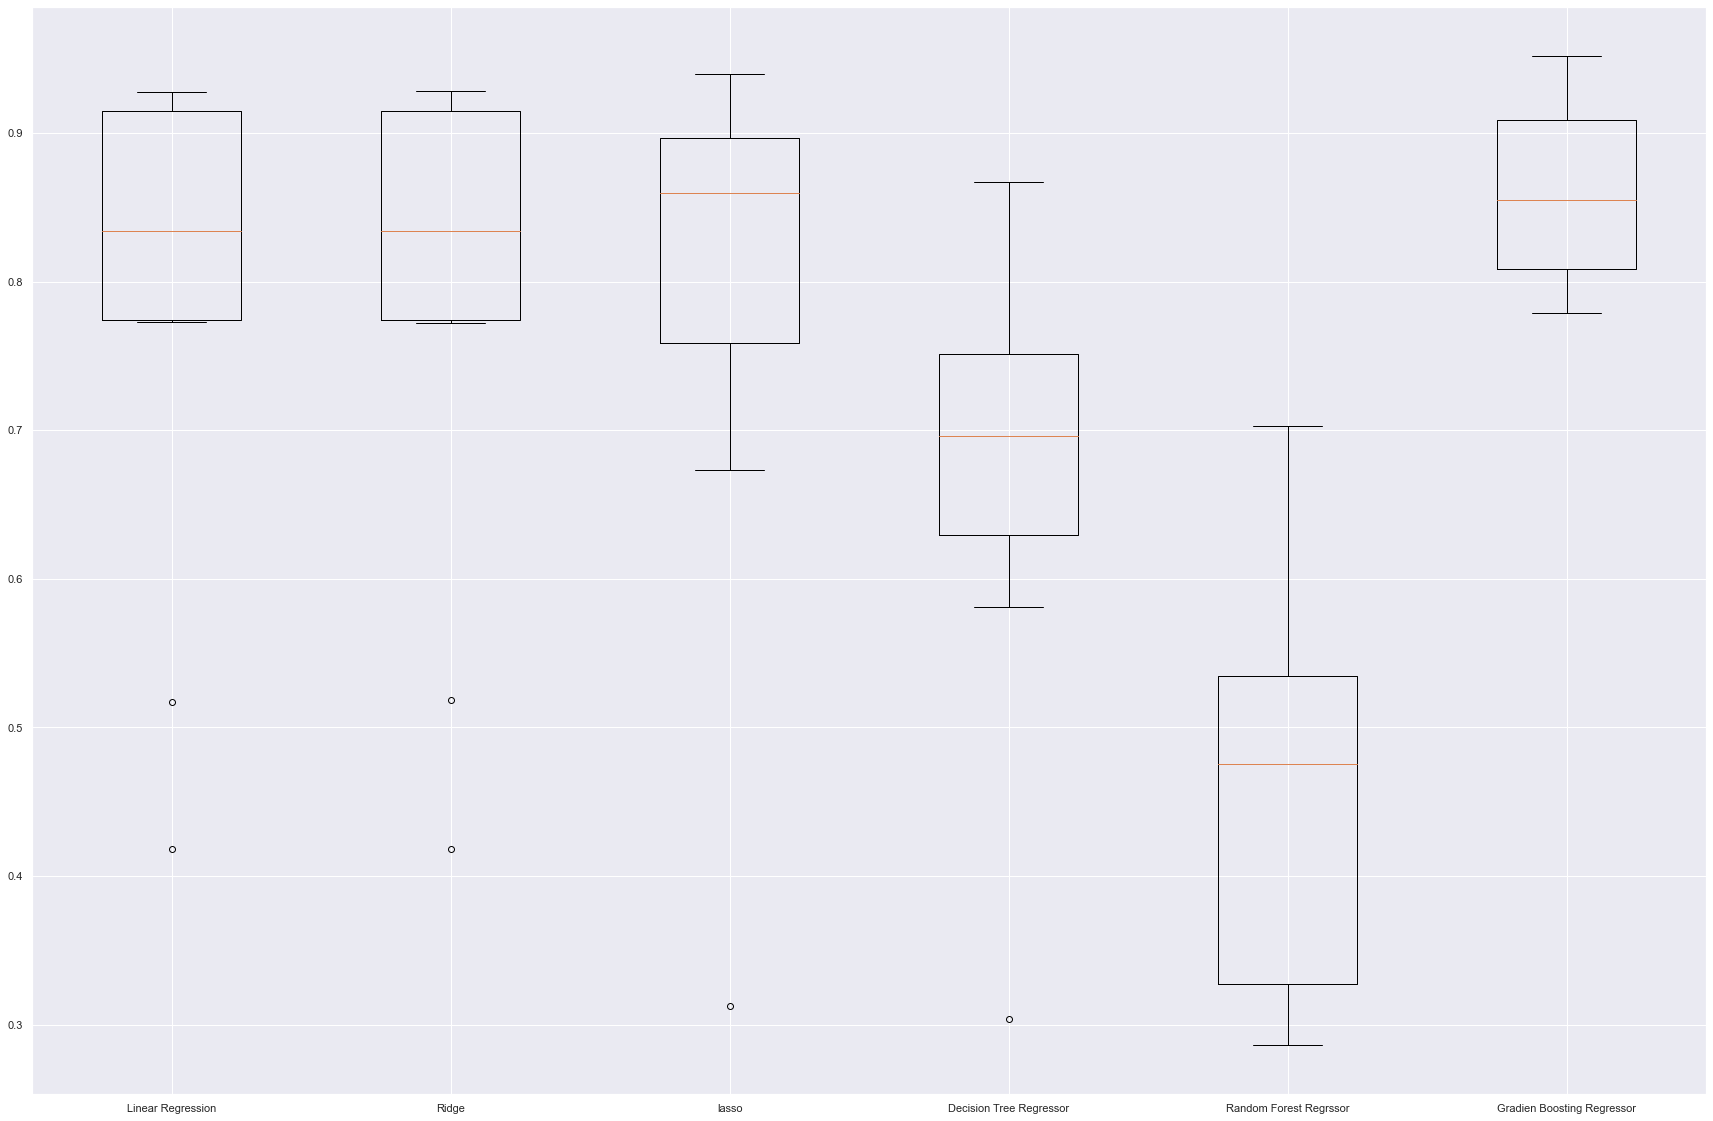

In [17]:
# getting models name x_axis
models_name=models.keys()
#we have list of result for y_axis = result
#plot our box plot with models_name along x-axis and result long y-axis
plt.boxplot(result , labels= models_name)

plt.show()

on above box plot we can visualize that Gradient Boosting Regressor model have highest score so
we will choice it for our prediction

In [32]:
GBR=GradientBoostingRegressor(subsample=0.8 , n_estimators=1000 , max_depth=1 , random_state=state)

In [33]:
GBR.fit(X_check_train ,y_check_train)

GradientBoostingRegressor(max_depth=1, n_estimators=1000, random_state=3,
                          subsample=0.8)

In [34]:
GBR.score(X_check_test , y_check_test)

0.8791138091058963

In [35]:
feature_importance= pd.Series(GBR.feature_importances_ , index=df.columns[1:])

In [36]:
sorted_importance=feature_importance.sort_values(ascending =False)

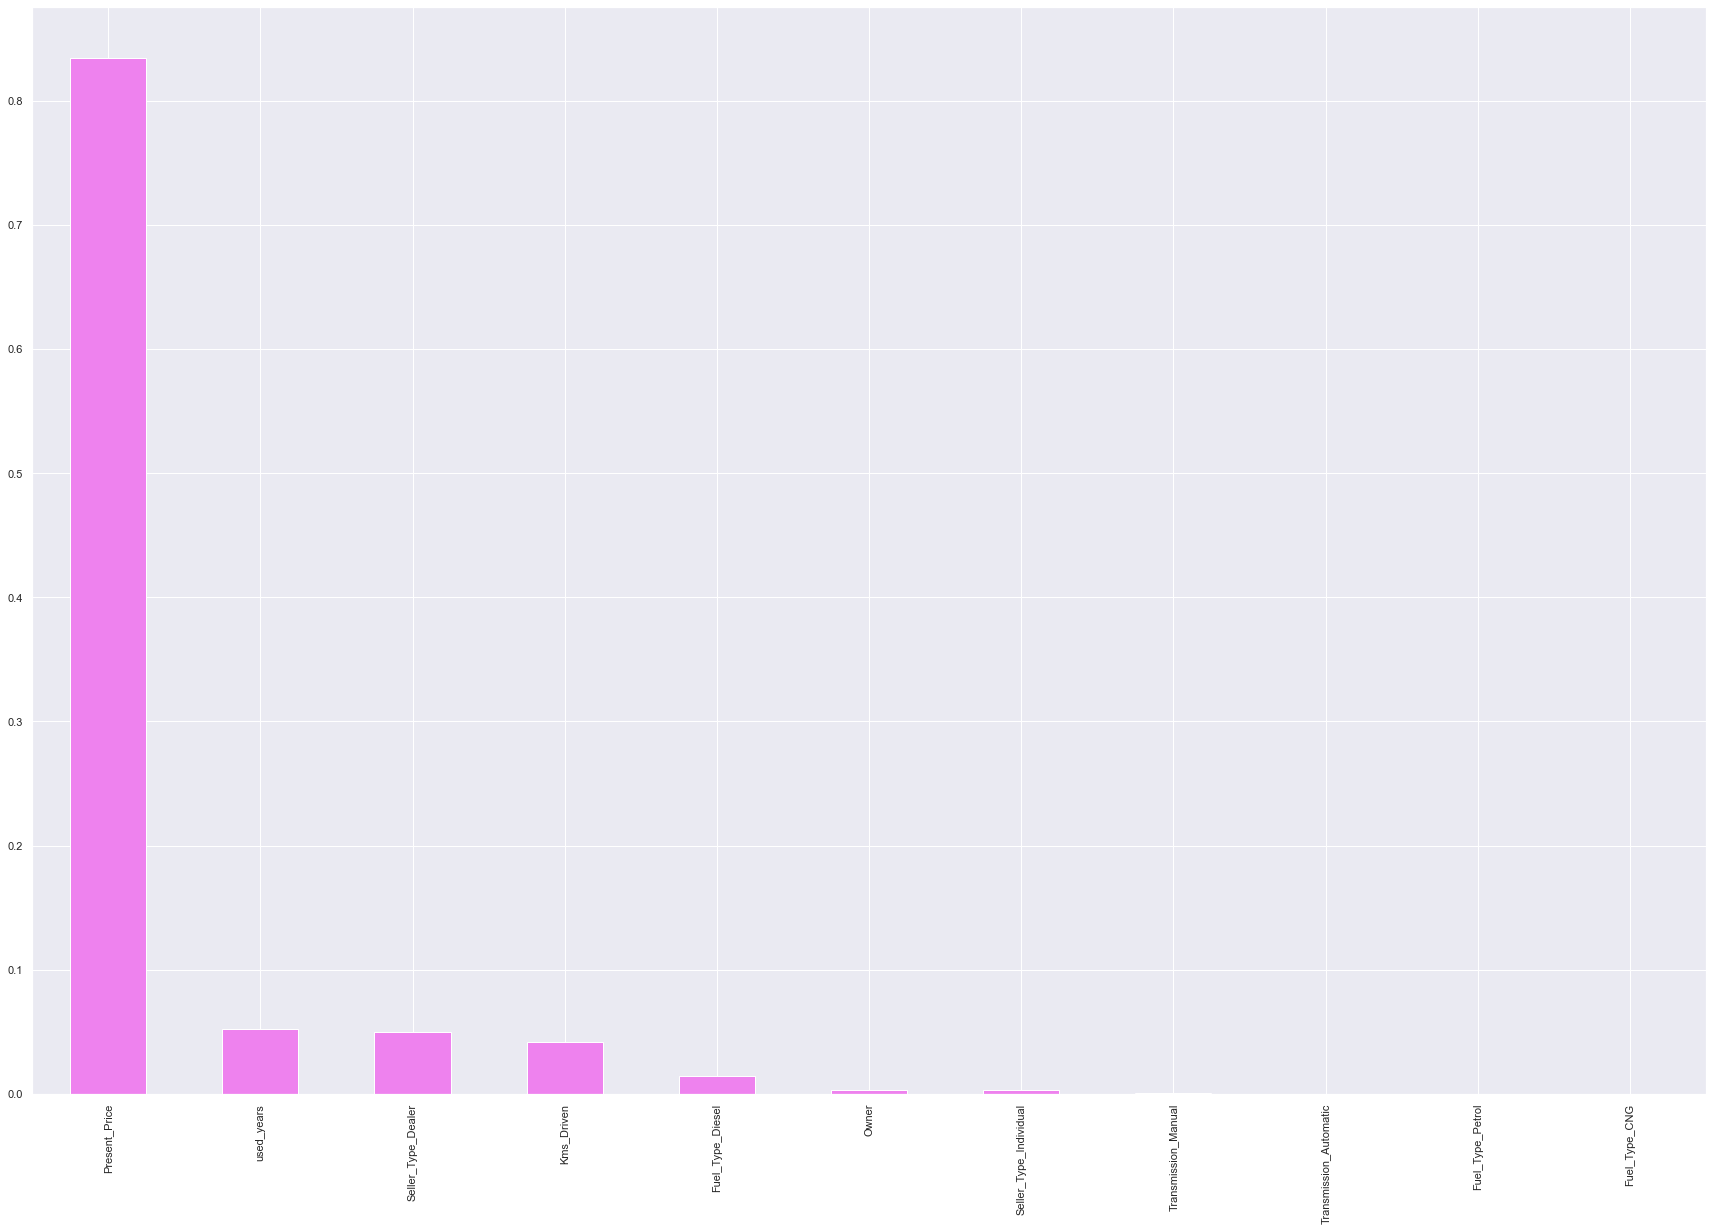

In [37]:
sorted_importance.plot(kind='bar' , color='violet')
sns.set(font_scale=(3))
plt.show()

In [38]:
#we have only 7 Importance features so we will use the as train value
X=df[['Present_Price' , 'Seller_Type_Individual','Seller_Type_Dealer','used_years','Kms_Driven','Fuel_Type_Diesel']].values
y=df['Selling_Price'].values

In [39]:
X_train ,X_test , y_train ,y_test= train_test_split(X ,y ,test_size=0.2 , random_state=3)
print(f"size train feature : {X_train.shape}  , size test feature :  {X_test.shape}   \n size of train target : \
{y_train.shape}   ,   size of test target : {y_test.shape}") 

size train feature : (240, 6)  , size test feature :  (61, 6)   
 size of train target : (240,)   ,   size of test target : (61,)


In [40]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [41]:
scaledX_train=scale.fit_transform(X_train)
scaledX_test=scale.transform(X_test)

In [42]:
model=GradientBoostingRegressor(random_state=state)

model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 3,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [43]:
parameters={'learning_rate' : np.linspace(0.1 , 0.2, 2),
            'n_estimators' :  [int(x) for x in np.linspace(100, 1500, 3)], 
            'subsample':np.linspace(0.6 , 1 ,3 ), 
            'min_samples_leaf' :[1,3,5], 
            'max_depth' : [int(x) for x in np.linspace(3 , 10, 3)]}

In [44]:
#importing Gradient search CV function to choice best model parameters
from sklearn.model_selection import GridSearchCV

In [45]:
#fitted_model = model.fit(X_train ,y_train)
kf=KFold(n_splits=10 , random_state=state ,shuffle=True)

grid_model=GridSearchCV(estimator = model ,
                        param_grid = parameters ,
                        scoring = 'neg_mean_squared_error',
                        cv=kf,
                        n_jobs = -1)


In [46]:
grid_model.fit(X_train , y_train)

best_hyperparametrs= grid_model.best_params_

best_score =grid_model.best_score_

best_model = grid_model.best_estimator_

best_index = grid_model.best_index_

In [56]:
best_hyperparametrs

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 800,
 'subsample': 1.0}

In [43]:
GBR_model = GradientBoostingRegressor()

In [45]:
from sklearn.metrics import mean_squared_error
GBR_model.fit(X_train , y_train)
score = GBR_model.score(X_test , y_test)
y_pred=GBR_model.predict(X_test)
MSE =mean_squared_error(y_test , y_pred)
print(f"Accuracy of our model : {score*100} % ")
print(f"RMSE : {np.sqrt(MSE)}")

Accuracy of our model : 95.20374052038426 % 
RMSE : 1.0141374315168026


In [49]:
def prediction(model):
    user_input=[]
    present_price=int(input("What is present Price in USD ?  "))
    user_input.append(present_price/1000)
    seller_type=input("what is seller type ? \n for Individual seller insert 'I' \n for Deller seller insert 'D'")
    
    if seller_type=='I' or seller_type=='i':
        user_input.append(1)
        user_input.append(0)
    elif seller_type=='D' or seller_type=='d':
        user_input.append(0)
        user_input.append(1)
        
    manufacture_year=int(input('when it was manuactured the car ?  '))
    selling_year = int( input('when do you want sell your car ? '))
    user_input.append(selling_year - manufacture_year)
    
    Km_driven=int(input('enter total driven distance in kilometer :  '))
    user_input.append(Km_driven)
    diesel=input("is it Diesel ?  \n 'y' or 'n'")
    
    if diesel=='y':
        user_input.append(1)
    else:
        user_input.append(0)
        
    selling_price=model.predict([np.array(user_input)])
    print(f"you will sell your car with = {int(1000*selling_price)} USD")
    
    
    
    
    

In [50]:
prdict = prediction(GBR_model)

What is present Price in USD ?  45459
what is seller type ? 
 for Individual seller insert 'I' 
 for Deller seller insert 'D'i
when it was manuactured the car ?  2014
when do you want sell your car ? 2023
enter total driven distance in kilometer :  24000
is it Diesel ?  
 'y' or 'n'y
you will sell your car with = 30746 USD
